# Assignment Netwerkanalyse

## Notebook made by

**Gebruik graag dit formaat**

* Voor de namen:  voornaam rest van je naam, voornaam rest van je naam,....
* je studentnummers: hetzelfde: scheidt met `,`
* je emails: hetzelfde: scheidt met `,`
* voor je groep: alleen de hoofdletter (dus voor de groep van Marx zou je `A` kiezen)

__Namen__:Anoniem
__Emails__:Anoniem
__Student id__:Anoniem
__Groep__:Anoniem

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

# Week 6

In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nose.tools import assert_equal, assert_count_equal
from numpy.testing import assert_almost_equal
import math

# First Course: chap 3.3 Friendship Paradox

1. Maak een netwerkx netwerk van Figuur 3.5.
2. Waarom is de kans dat je Tom vindt met de "random friend of picked person" methode $\frac{5}{21}$. Geef een heel helder antwoord.
3. Programmeer de functie `kans_op_knoop(G,knoop)` die voor elk netwerk, voor elke knoop de kans berekent dat je die knoop trekt met de "random friend of picked person" methode.
4. Schrijf een test die checked dat die kansen optellen tot 1.
5. **Advanced** In de een na laatste paragraaf van 3.3 op blz 76 wordt een andere manier om die kansen te berekenen gemeld, die dezelfde uitkomst geeft. Programmeer die ook, en vergelijk de uitkomsten.
    

0.21428571428571427


0.017825311942959002

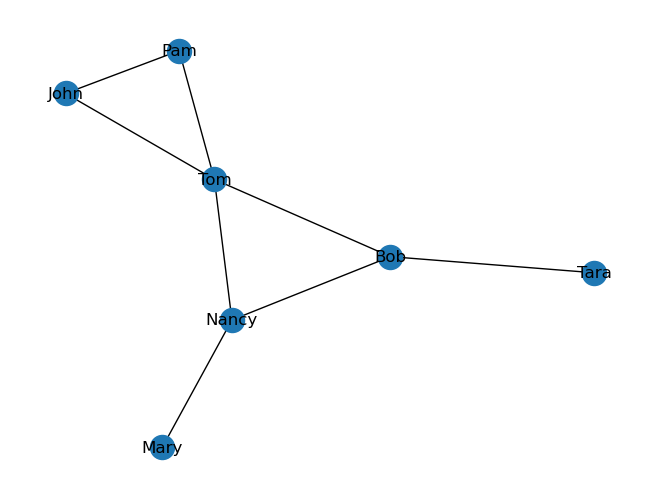

In [2]:
Fig35=nx.Graph()
Nodes = ['Mary', 'Nancy', 'Tom', 'Tara', 'Bob', 'Pam', 'John']
Edges = [['Mary', 'Nancy'], ['Nancy', 'Tom'], ['Nancy', 'Bob'], ['Bob', 'Tara'], ['Bob', 'Tom'], ['Tom', 'John'], ['Tom', 'Pam'], ['Pam', 'John']]
Fig35.add_edges_from(Edges)
Fig35.add_nodes_from(Nodes)
nx.draw(Fig35, with_labels=True)
kans = 1/7 * 1/2 + 1/7 * 1/3 + 1/7*0 + 1/7*1/3 + 1/7*1/3 + 1/7*0
print(kans)
def kans_op_knoop(G,knoop):
    total_links = len(G.nodes) * (len(G.nodes) - 1) // 2
    return (len(G.edges(knoop)) + 1) / total_links 

 

H= nx.karate_club_graph() 
# test
sum(kans_op_knoop(H,x) for x in H)
kans_op_knoop(H,1)

In [3]:
assert isinstance(Fig35, nx.Graph)
H= nx.karate_club_graph()
assert 0 <= kans_op_knoop(H,1)<= 1


# First course

Maak de sommen 3.11-3.24.

3.11
* Node 1, 2, 3 and 5
* Probably 2
* Node 1

3.12

3.13:
* a) No, i would say that shoe sizes in UK adults are more normally distributed. this is because only a select few people have gigantic feet, the average adult's feet stop growing at a reasonable size.
* b) Yes, i would expect the graph to be heavy-tailed since the distribution of money in the U.S if pretty disproportionate. Middle class income is ofcourse the most prominent but there are a lot of rich people there. 
* c) Yes i would expect it to be heavy-tailed. Some nodes in Twitter's network might have the entire population of Uganda in their friend's list (this is an exaggeration) since some people are more popular than other and there isn't actually a limit as to how many people you can follow as far as i know
* d) No I would not expect it to be heavy-tailed. Its quite common knowledge that you can go from a random wikipedia article to another random article in just a few links. I think you would have a hard time finding a large distance between two articles.

3.14:
* I would be surprised to say the least, a 9m tall person is absolutely gigantic! To answer the question though, I would still be suprised since the deviation from 9m and the standard is very large. A heavy-tailed distribution makes a 9m tall person possible but still a rare occurence.

3.15:
a) 100.000.000
b) 10.000.000
c) 10.000

3.16:
* The maximum degree in this network is technically 4780. It means you had coitus with 4780 people. No they don't. as said in the article, males tend to have a higher degree than females

3.17: zie onder

3.19: zie onder

3.20: 
* Yes, this is the case in a complete graph.

3.21:
* Yes I would say they are more vulnerable, because even though the chance you hit a node with a high degree is lower, the damage that that would do is significantly higher than if you picked a random node to destroy in a grid-like structure. 

3.22:
* D, since a node with a high betweenness centrality means that that node has a high amount of shortest paths running though it. Disrupting this means lenghtening a lot of the paths between nodes.

3.23:
* The node with a low clustering coefficient, the fact that it has a low coefficient means that its possible the node is a bridge between two hubs (even though the degree might be the same for two nodes). A node in the middle of a hub is less valuable than a node connencting hubs, since with the latter the average path length increases a lot if it is destroyed.

3.24:
* Het is laat dat ga ik op dit moment niet meer doen denk ik hahahas

In [4]:
fname='../../../data/Week6/openflights_usa.edges.gz'
G = nx.Graph()
G = nx.read_edgelist(fname)
#4.17
#1
average_deg = nx.average_degree_connectivity(G)
#2
sorted_dict = sorted(average_deg.items(), key=lambda x:x[1], reverse=True)
# print(sorted_dict)
#3 
# print(len([x for x in G if G.degree(x) == 1]))
#4
average_close = nx.closeness_centrality(G)
sorted_dict2 = sorted(average_close.items(), key=lambda x:x[1], reverse=True)
#5


In [5]:
fname="../../../data/Week6/enwiki_math.edges.gz"
K = nx.digraph()
K = nx.read_edgelist(fname)


TypeError: 'module' object is not callable

In [ ]:
#3.19
def average_degree_of_nodes_neighbors(G, knoop):
    buren = list(nx.neighbors(G, knoop))
    gemiddeldes = [len(list(nx.all_neighbors(G, x))) for x in buren]
    return sum(gemiddeldes) / len(gemiddeldes)